In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf

Loading raw...
Loaded raw!
[ 0.00000000e+00 -3.05175781e-05  3.05175781e-05 ...  5.49316406e-04
  3.35693359e-04  8.23974609e-04]


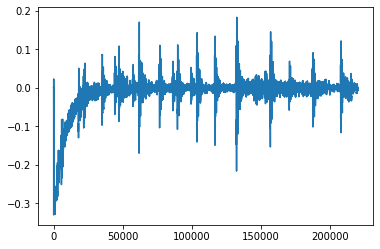

In [2]:
sr = 44100

print("Loading raw...")
loaded_raw = sf.SoundFile("recorded.RAW", samplerate=sr, channels=1, subtype='FLOAT')
print("Loaded raw!")
read_raw = loaded_raw.read(dtype=np.float64, always_2d=False)
read_transpose = read_raw.T
duration = librosa.get_duration(read_raw, sr=sr)

plt.plot(read_transpose)
print(read_transpose)

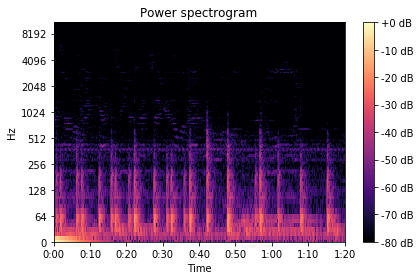

In [3]:
result_stft = librosa.stft(read_transpose, win_length=2048, hop_length=64)

result_real = []
result_imag = []
for result in result_stft:
    result_real.append(result.real)
    result_imag.append(result.imag)
    
result_abs = np.abs(result_stft)

librosa.display.specshow(librosa.amplitude_to_db(result_abs, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

[(-0.120457+0j), (0.354888+0.063523j), (-0.265962-0.512203j), (0.292156-0.100909j), (-0.049253+0.026259j), (-0.001773-0.007868j), (-0.035654-0.029177j), (-0.011587+0.025201j), (-0.018086-0.004885j), (-0.005515-0.021115j), (0.010934-0.007915j), (0.00228-0.02212j), (-0.003861+0.013189j), (-0.012331-0.015317j), (-0.001655-0.010123j), (0.006868+0.002297j), (-0.020325-0.008571j), (-0.008111-0.00763j), (0.003354-0.011853j), (-0.005905-0.0045j), (-0.002912-0.009439j), (1.9e-05+0.002549j), (-0.001672-0.012281j), (-0.000396+0.001447j), (0.001772-0.000378j), (0.006887-0.012582j), (-0.004971+0.009549j), (-0.012956-0.014246j), (-0.002695-0.010648j), (0.001767-0.007871j), (-0.001047-0.012245j), (0.007448-0.009344j), (-0.002983-0.002761j), (0.015171+0.001416j), (0.006599-0.00553j), (-0.017106-0.022162j), (0.017974+0.043393j), (-0.018236-0.013925j), (-0.003151+0.005433j), (-0.000812-0.003156j), (0.002131-0.000374j), (0.002146+0.000621j), (-0.00596+0.000731j), (0.000179-0.004238j), (-0.004576-0.002899

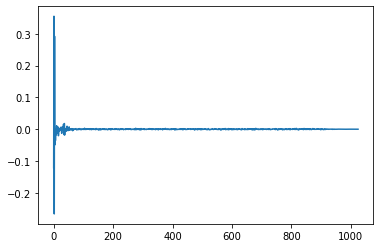

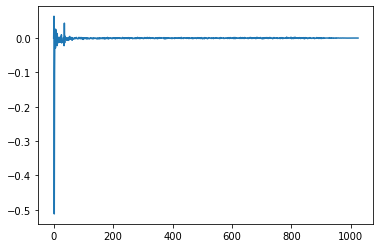

In [4]:
c_fft_out = open("FFT_OUT")

result_real = []
result_imag = []
c_fft = []
for line in c_fft_out:
    vals = line.strip().split(",")
    
    if len(vals) == 2:
        result_real.append(float(vals[0]))
        result_imag.append(float(vals[1]))
        
        x = complex(float(vals[0]), float(vals[1]))
        c_fft.append(x)
        
fig3, ax3 = plt.subplots()
ax3.plot(result_real)

fig4, ax4 = plt.subplots()
ax4.plot(result_imag)

print(c_fft)

### LOOKING AT LMS PART

[[0.00000e+00 0.00000e+00]
 [2.26757e-05 0.00000e+00]
 [4.53515e-05 0.00000e+00]
 ...
 [3.40068e-01 0.00000e+00]
 [3.40091e-01 0.00000e+00]
 [3.40113e-01 0.00000e+00]]


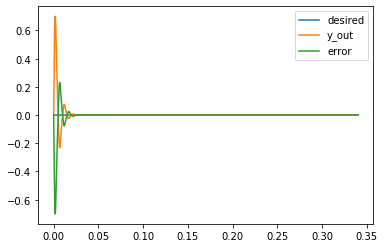

In [11]:
fYOut = open("Y_OUT")
fError = open("ERROR")
fDesired = open("DESIRED")
fNoise = open("NOISE")

desired = []
for line in fDesired:
    val = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)
    if len(val) == 2:
        desired.append((val[0], val[1]))

y_out = []
for line in fYOut:
    val = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)
    if len(val) == 2:
        y_out.append((val[0], val[1]))
        
error = []
for line in fError:
    val = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)
    if len(val) == 2:
        error.append((val[0], val[1]))
        
noise = []
for line in fNoise:
    val = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)
    if len(val) == 2:
        noise.append((val[0], val[1]))
        
desired = np.array(desired, 'float')
y_out = np.array(y_out, 'float')
error = np.array(error, 'float')
noise = np.array(noise, 'float')

print(desired)

fig, ax = plt.subplots()

ax.plot(desired[:, 0], desired[:, 1], label="desired")
ax.plot(y_out[:, 0], y_out[:, 1], label="y_out")
ax.plot(error[:, 0], error[:, 1], label="error")
#ax.plot(noise[:, 0], noise[:, 1], label="noise")
ax.legend()
plt.show()